# Model 3 for Leaf Image Classification Project

### Load Packages and Images

In [2]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, Adamax, Nadam
import keras.optimizers
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow import keras
import random
import tensorflow as tf

In [3]:
EPOCHS = 2
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3
root_directory = r"C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all"

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
image_list, label_list = [], []
try:
    print("Loading images ...")

    
    #DIRECTORY 1
    poison_ivy = "poison_ivy"
    directory1 = root_directory + "\\" + poison_ivy    
    list_directory1 = listdir(directory1)
    
    for image in list_directory1[:200]:
        image_directory1 = f"{directory1}\\{image}"        
        if image_directory1.endswith(".jpg") == True or image_directory1.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory1))
            label_list.append(poison_ivy)

    
    #DIRECTORY 2
    raspberry = "raspberry"
    directory2 = root_directory + "\\" + raspberry
    list_directory2 = listdir(directory2)
    
    for image in list_directory2[:]:
        image_directory2 = f"{directory2}\\{image}"
        if image_directory2.endswith(".jpg") == True or image_directory2.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory2))
            label_list.append(raspberry)
    
    
    #DIRECTORY 3
    potato = "potato"
    directory3 = root_directory + "\\" + potato
    list_directory3 = listdir(directory3)
    
    for image in list_directory3[:]:
        image_directory3 = f"{directory3}\\{image}"
        if image_directory3.endswith(".jpg") == True or image_directory3.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory3))
            label_list.append(potato)
    
    
    #DIRECTORY 4
    tomato = "tomato"
    directory4 = root_directory + "\\" + tomato
    list_directory4 = listdir(directory4)
    
    for image in list_directory4[:]:
        image_directory4 = f"{directory4}\\{image}"
        if image_directory4.endswith(".jpg") == True or image_directory4.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory4))
            label_list.append(tomato)
    
    #DIRECTORY 5
    bell_pepper = "bell_pepper"
    directory5 = root_directory + "\\" + bell_pepper
    list_directory5 = listdir(directory5)
    
    for image in list_directory5[:]:
        image_directory5 = f"{directory5}\\{image}"
        if image_directory5.endswith(".jpg") == True or image_directory5.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory5))
            label_list.append(bell_pepper)
    
    
    print("Image loading completed")
except Exception as e:
    print(f"Error : {e}")

Loading images ...
Image loading completed


In [6]:
image_size = len(image_list)
print(image_size)

3599


### Create and Build Model

In [7]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [8]:
print(label_binarizer.classes_)
print(n_classes)

['bell_pepper' 'poison_ivy' 'potato' 'raspberry' 'tomato']
5


In [9]:
np_image_list = np.array(image_list, dtype=np.float16)

In [10]:
print("Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

Spliting data to train, test


In [11]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [12]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0

In [15]:
#OPTIMIZE AND REDUCE LOSS
opt1 = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt3 = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
opt4 = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)


# distribution
model.compile(loss="binary_crossentropy", optimizer=opt1, metrics=["accuracy"])
# train the network
print("training network...")

training network...


In [16]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=3, verbose=1
    )

C:\Users\marti\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
89/89 [==============================] - 253s 3s/step - loss: 0.5584 - accuracy: 0.8009 - val_loss: 0.8174 - val_accuracy: 0.7458
Epoch 2/3
89/89 [==============================] - 255s 3s/step - loss: 0.1437 - accuracy: 0.9220 - val_loss: 0.5103 - val_accuracy: 0.6569
Epoch 3/3
89/89 [==============================] - 250s 3s/step - loss: 0.0751 - accuracy: 0.9425 - val_loss: 0.4370 - val_accuracy: 0.5250


In [17]:
model.compile(loss="binary_crossentropy", optimizer=opt2, metrics=["accuracy"])


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=3, verbose=1
    )

Epoch 1/3
89/89 [==============================] - 262s 3s/step - loss: 0.1205 - accuracy: 0.9125 - val_loss: 0.7427 - val_accuracy: 0.6958
Epoch 2/3
89/89 [==============================] - 260s 3s/step - loss: 0.0901 - accuracy: 0.9270 - val_loss: 8.5549 - val_accuracy: 0.3958
Epoch 3/3
89/89 [==============================] - 260s 3s/step - loss: 0.0718 - accuracy: 0.9414 - val_loss: 0.8067 - val_accuracy: 0.5903


In [18]:
model.compile(loss="binary_crossentropy", optimizer=opt3, metrics=["accuracy"])


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=3, verbose=1
    )

Epoch 1/3
89/89 [==============================] - 276s 3s/step - loss: 0.0826 - accuracy: 0.9372 - val_loss: 0.3232 - val_accuracy: 0.8306
Epoch 2/3
89/89 [==============================] - 268s 3s/step - loss: 0.0511 - accuracy: 0.9522 - val_loss: 0.3538 - val_accuracy: 0.7708
Epoch 3/3
89/89 [==============================] - 274s 3s/step - loss: 0.0420 - accuracy: 0.9597 - val_loss: 0.2654 - val_accuracy: 0.8347


In [19]:
model.compile(loss="binary_crossentropy", optimizer=opt4, metrics=["accuracy"])


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=3, verbose=1
    )

Epoch 1/3
89/89 [==============================] - 306s 3s/step - loss: 0.0717 - accuracy: 0.9400 - val_loss: 0.3672 - val_accuracy: 0.8694
Epoch 2/3
89/89 [==============================] - 299s 3s/step - loss: 0.0666 - accuracy: 0.9385 - val_loss: 1.5882 - val_accuracy: 0.4708
Epoch 3/3
89/89 [==============================] - 307s 3s/step - loss: 0.0505 - accuracy: 0.9559 - val_loss: 0.0704 - val_accuracy: 0.9500


### Plot Model Accuracy

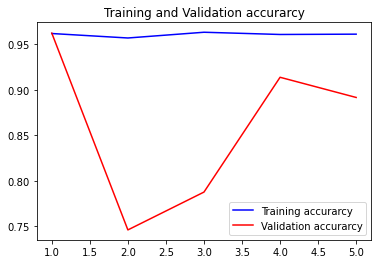

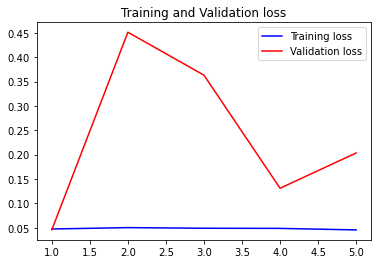

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [19]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
23/23 [==============================] - 10s 452ms/step - loss: 0.2034 - accuracy: 0.8917
Test Accuracy: 89.16666507720947


In [87]:
# FOLLOWING CODE IS NOT WORKING
################################
# print("[INFO] Saving model...")
# pickle.dump(model, open('cnn_model.pkl', 'wb'))
# loaded_model = pickle.load(open('cnn_model.pkl', 'rb'))
# loaded_model = pickle.load(open('path\\cnn_model.pkl', 'rb'))

In [20]:
#SAVE MODEL
model.save(root_directory + r"\project_model_5_classes.h5")

In [21]:
#LOAD MODEL
model = keras.models.load_model(root_directory + r"\project_model_5_classes.h5")

### Predict Image Classification

In [22]:
def choose_rand_image(directory):
    image_pred5_list = listdir(directory)    
    return (directory + '\\' + random.choice(image_pred5_list))

In [23]:
def pred_image(image):
    im=convert_image_to_array(image)
    np_image_li = np.array(im, dtype=np.float16)
    npp_image = np.expand_dims(np_image_li, axis=0)
    result=model.predict(npp_image)
    
    print(image)
    print(result)
    itemindex = np.where(result==np.max(result))
    prob = np.max(result)
    print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])
    print()
    
    data = plt.imread(image)
    plt.imshow(data)
    plt.show()
    print()
        
    return(result, prob)

In [26]:
image_pred1 = root_directory + r"\!testdata\poison_ivy\IMG_4627.jpg"
image_pred2 = root_directory + r"\!testdata\potato\ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG"
image_pred3 = root_directory + r"\!testdata\raspberry\IMG_4689.jpg"
image_pred4 = root_directory + r"\!testdata\tomato\fe28e4c7-0c35-4f52-984e-0e60f33a2c6e___GH_HL Leaf 198.JPG"
image_pred5 = root_directory + r"\!testdata\bell_pepper\ff27ffcd-921c-4b13-827a-ddbb311ea50c___JR_HL 8246.JPG"
image_pred6 = choose_rand_image(root_directory + r"\!testdata\!random")

# print(image_pred5)
# print(choose_rand_image(r"C:\Users\marti\Downloads\data_all\data_all\!testdata\!random"))

C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\poison_ivy\IMG_4627.jpg
[[7.0125163e-05 9.8464626e-01 1.4760660e-02 4.7005090e-04 5.2954052e-05]]
probability:0.98464626
poison_ivy



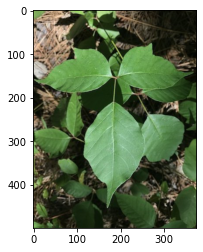


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\potato\ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG
[[2.3959452e-09 5.0195388e-07 1.7230229e-07 8.4800202e-09 9.9999928e-01]]
probability:0.9999993
tomato



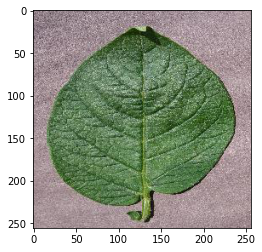


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\raspberry\IMG_4689.jpg
[[4.3250594e-08 5.1896021e-02 1.1101212e-04 9.4799173e-01 1.2244335e-06]]
probability:0.9479917
raspberry



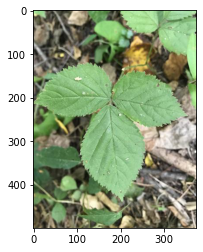


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\tomato\fe28e4c7-0c35-4f52-984e-0e60f33a2c6e___GH_HL Leaf 198.JPG
[[1.7747254e-10 3.9069610e-06 3.1966258e-05 2.0873335e-05 9.9994326e-01]]
probability:0.99994326
tomato



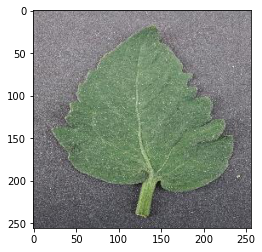


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\bell_pepper\ff27ffcd-921c-4b13-827a-ddbb311ea50c___JR_HL 8246.JPG
[[7.7698100e-01 1.8005766e-01 2.0861462e-05 2.4462923e-05 4.2916022e-02]]
probability:0.776981
bell_pepper



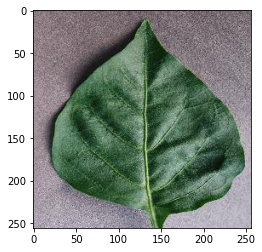

In [27]:
pred_image(image_pred1);
pred_image(image_pred2);
pred_image(image_pred3);
pred_image(image_pred4);
pred_image(image_pred5);

C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\IMG_4629.jpg
[[6.1105104e-10 9.8131746e-01 2.0097586e-06 1.8329140e-02 3.5137334e-04]]
probability:0.98131746
poison_ivy



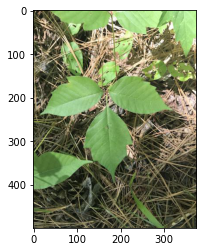

In [29]:
#RANDOM PICTURE SELECTED AND PREDICTED
image_pred5 = choose_rand_image(root_directory + r"\!testdata\!random")
pred_image(image_pred6);

### Predictions and Probability Distribution Graph

In [30]:
def ran_prob_dist():
    prob_list = []
    img_count = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
    for x in range (0, 15):
        rand_image_pred = choose_rand_image(root_directory + r"\!testdata\!random")
        result, prob = pred_image(rand_image_pred)
        prob_list.append(prob)
        #img_count += 1
    
    #print(prob_list, img_count)
    
#     print("Probability Distribution:")
    
    plt.scatter(img_count, prob_list)
    plt.xlabel("Image")
    plt.ylabel("Probability of Accuracy")
    plt.title("Probability Distribution")
    plt.show()

C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\ff276d07-04ef-4919-9762-a6548f8cf21c___JR_HL 7621.JPG
[[9.9999964e-01 3.4620382e-07 3.3093139e-11 1.0482223e-08 1.7683734e-08]]
probability:0.99999964
bell_pepper



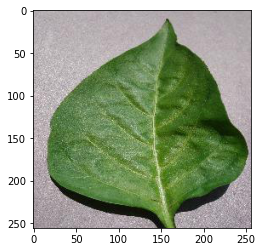


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\ff774aec-2504-4d11-8a61-2fd74c689a6f___RS_HL 9904.JPG
[[2.0693455e-18 2.2400201e-10 6.2359197e-15 6.0108651e-13 1.0000000e+00]]
probability:1.0
tomato



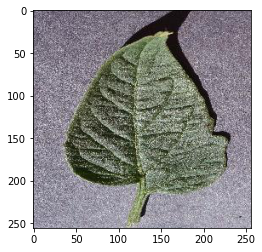


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\fed15b37-0129-4436-a832-d98d9f446f9a___JR_HL 8437.JPG
[[1.3442876e-02 9.7823960e-01 8.8375346e-06 1.3810406e-04 8.1706680e-03]]
probability:0.9782396
poison_ivy



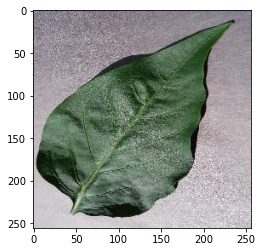


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\ff276d07-04ef-4919-9762-a6548f8cf21c___JR_HL 7621.JPG
[[9.9999964e-01 3.4620382e-07 3.3093139e-11 1.0482223e-08 1.7683734e-08]]
probability:0.99999964
bell_pepper



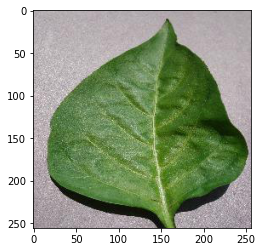


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\f30983c0-6e20-43cc-8672-4622ca34c830___RS_HL 1949.JPG
[[1.2982866e-08 6.7224533e-07 4.8013922e-06 9.1577013e-09 9.9999452e-01]]
probability:0.9999945
tomato



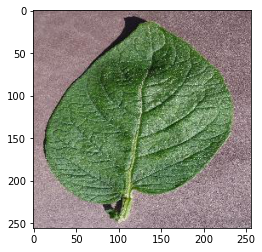


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\IMG_4692.jpg
[[2.8002418e-09 3.1518293e-04 1.3895764e-04 9.9954575e-01 8.9727330e-08]]
probability:0.99954575
raspberry



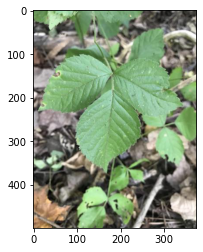


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\IMG_4692.jpg
[[2.8002418e-09 3.1518293e-04 1.3895764e-04 9.9954575e-01 8.9727330e-08]]
probability:0.99954575
raspberry



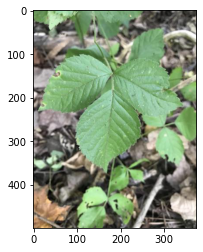


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\fd92bd9c-02cb-4599-8673-9316159504a1___RS_HL 1927.JPG
[[1.1857544e-08 4.6298160e-06 3.8975809e-04 4.9269539e-07 9.9960512e-01]]
probability:0.9996051
tomato



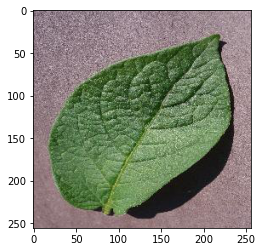


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\fef57c46-de88-400b-81d1-6e2a7e990ee0___JR_HL 8670.JPG
[[9.9676824e-01 1.1764260e-03 1.9753352e-06 1.3706189e-03 6.8262732e-04]]
probability:0.99676824
bell_pepper



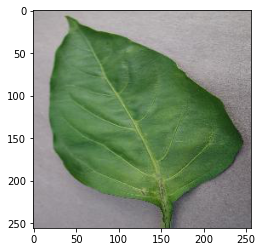


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\ffb39943-eabb-42cf-ad09-b17019e46d66___RS_HL 9871.JPG
[[6.1165194e-15 8.1237248e-09 5.1832245e-12 1.6130598e-10 1.0000000e+00]]
probability:1.0
tomato



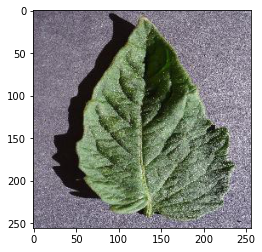


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\IMG_4627.jpg
[[7.0125163e-05 9.8464626e-01 1.4760660e-02 4.7005090e-04 5.2954052e-05]]
probability:0.98464626
poison_ivy



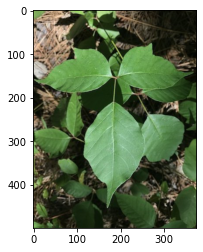


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\IMG_4697.jpg
[[4.2265681e-05 5.3193235e-01 1.3196424e-03 4.6669617e-01 9.5008172e-06]]
probability:0.53193235
poison_ivy



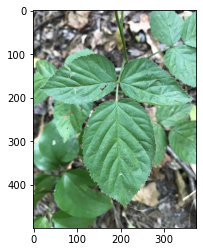


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\fec718e1-5498-4c71-802a-d4689ebd69cc___JR_HL 8230.JPG
[[7.7199793e-01 5.4960144e-03 1.5951645e-07 2.8652603e-06 2.2250310e-01]]
probability:0.7719979
bell_pepper



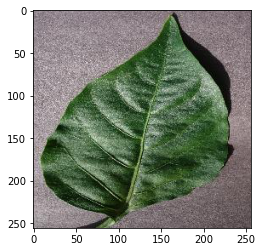


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\fef57c46-de88-400b-81d1-6e2a7e990ee0___JR_HL 8670.JPG
[[9.9676824e-01 1.1764260e-03 1.9753352e-06 1.3706189e-03 6.8262732e-04]]
probability:0.99676824
bell_pepper



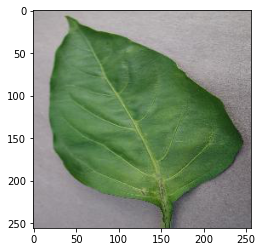


C:\Users\marti\Documents\!Photo Python Code\Final\data_all\data_all\!testdata\!random\f4b5ec24-d318-4309-8294-9126450d5d7f___RS_HL 1824.JPG
[[3.5744309e-04 8.8465356e-05 1.2417943e-03 3.1774914e-06 9.9830914e-01]]
probability:0.99830914
tomato



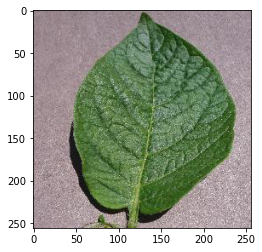

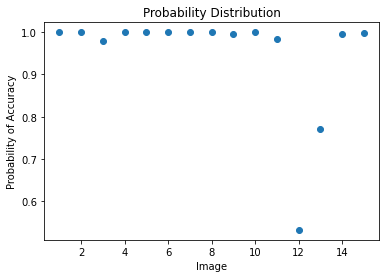

In [31]:
ran_prob_dist()